In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Import same dataset as previously done
df = pd.read_csv(
    "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
)

In [3]:
df.head(2)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217


In [4]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[base]

In [5]:
df.head(2)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217


EDA - visualising the distribution of fuel_efficiency_mpg

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

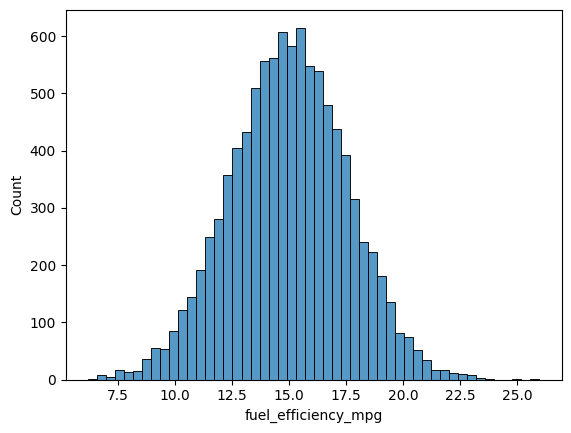

In [6]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

# Question 1

In [7]:
# Find the column with missing values
for column in df.columns:
  if df[column].isnull().sum() > 0:
    print(f"Column called \"{column}\" has missing values")

Column called "horsepower" has missing values


# Question 2

In [8]:
df.horsepower.median()

149.0

<Axes: >

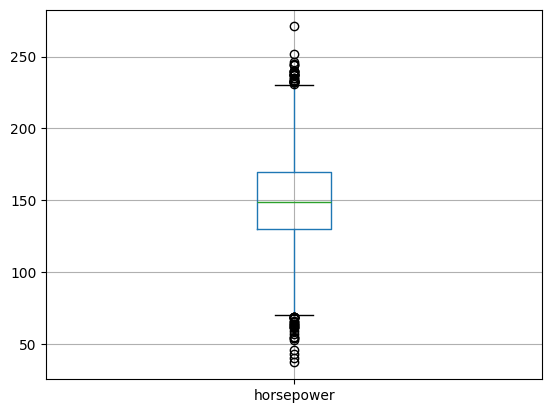

In [9]:
# check with a boxplot since this shows the 50th percentile graphically
df.boxplot(column=['horsepower'])

Prepare and split the dataset - Shuffle the dataset (the filtered one you created above), use seed 42. Split your data in train/val/test sets, with 60%, 20%, 20% distribution.

In [10]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [11]:
n, n_val, n_test, n_train

(9704, 1940, 1940, 5824)

In [12]:
# Shuffle to remove accidental order
idx = np.arange(n)
np.random.seed(42) # Set the seed for reproducibility
np.random.shuffle(idx) # Shuffle the indices

df = df.iloc[idx]

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [13]:
df_train.shape, df_val.shape, df_test.shape

((5824, 5), (1940, 5), (1940, 5))

In [14]:
# reset the indices as no longer need the original index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = df_train.fuel_efficiency_mpg.to_numpy()
y_val = df_val.fuel_efficiency_mpg.to_numpy()
y_test = df_test.fuel_efficiency_mpg.to_numpy()

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

# Question 3

In [16]:
# deal with missing values for the column from Q1 (horsepower)
# option 1: fill with 0 and train a linear regression model without regularization using the code from the lessons.
df_train_zero = df_train.copy()
df_val_zero = df_val.copy()
df_test_zero = df_test.copy()

df_train_zero['horsepower'] = df_train_zero['horsepower'].fillna(0)
df_val_zero['horsepower'] = df_val_zero['horsepower'].fillna(0)
df_test_zero['horsepower'] = df_test_zero['horsepower'].fillna(0)

In [17]:
def train_linear_regression(X, y):
  #Add bias column
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  # Normal equation
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  # Return biases, weights separately
  return w_full[0], w_full[1:]

In [18]:
# RMSE
def rmse(y, y_pred):
  se = (y - y_pred)**2
  mse = se.mean()
  return np.sqrt(mse)

In [19]:
# Use code to train baseline model
X_train = df_train_zero.values
X_val = df_val_zero.values
X_test = df_test_zero.values

w0, w = train_linear_regression(X_train, y_train)

In [20]:
y_pred = w0 + X_val.dot(w)
y_pred

array([19.40641594, 16.02904553,  8.71459576, ..., 16.83499412,
       17.83451025, 14.06427526])

<Axes: ylabel='Count'>

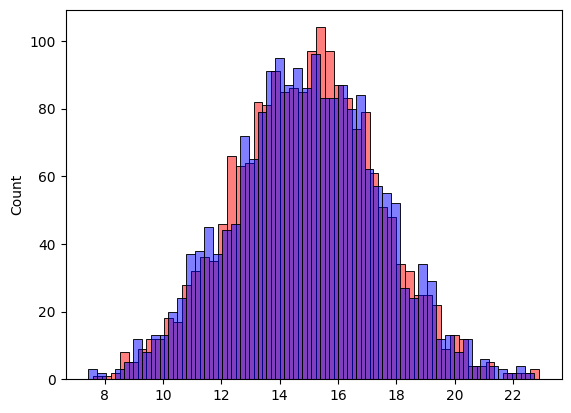

In [21]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50, label="Predictions")
sns.histplot(y_val, color='blue', alpha=0.5, bins=50, label="Actual")

In [22]:
np.round(rmse(y_val, y_pred),2)

np.float64(0.52)

In [23]:
# option 2: fill with the mean of this variable and train a linear regression model without regularization using the code from the lessons.
df_train_mean = df_train.copy()
df_val_mean = df_val.copy()
df_test_mean = df_test.copy()

df_train_mean['horsepower'] = df_train_mean['horsepower'].fillna(df_train_mean['horsepower'].mean())
df_val_mean['horsepower'] = df_val_mean['horsepower'].fillna(df_val_mean['horsepower'].mean())
df_test_mean['horsepower'] = df_test_mean['horsepower'].fillna(df_test_mean['horsepower'].mean())

In [24]:
# Use code to train baseline model
X_train = df_train_mean.values
X_val = df_val_mean.values
X_test = df_test_mean.values

w0, w = train_linear_regression(X_train, y_train)

In [25]:
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
y_pred = w0 + X_val.dot(w)
y_pred

array([19.56050596, 15.98309619,  8.61247786, ..., 16.98110404,
       17.66991279, 13.97559185])

<Axes: ylabel='Count'>

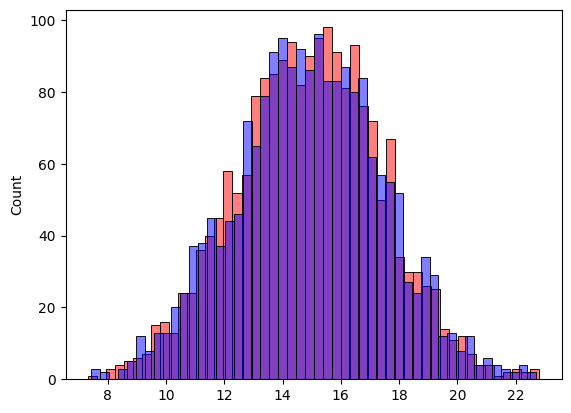

In [26]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50, label="Predictions")
sns.histplot(y_val, color='blue', alpha=0.5, bins=50, label="Actual")

In [27]:
np.round(rmse(y_val, y_pred),2)

np.float64(0.47)

In [28]:
# since 0.47 is less than 0.52, using the mean gives a better RMSE

# Question 4

In [29]:
def train_linear_regression_reg(X, y, r):
  #Add bias column
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  # Normal equation
  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  # Return biases, weights separately
  return w_full[0], w_full[1:]

In [30]:
# Use code to train regularized model
X_train = df_train_zero.values
X_val = df_val_zero.values
X_test = df_test_zero.values

regularized = [0, 0.01, 0.1, 1, 5, 10, 100]
regularized_results = dict()
for r in regularized:
  w0, w = train_linear_regression_reg(X_train, y_train, r)
  y_pred = w0 + X_val.dot(w)
  rmse_val = np.round(rmse(y_val, y_pred),2)
  regularized_results.update({r: float(rmse_val)})

In [31]:
regularized_results

{0: 0.52, 0.01: 0.52, 0.1: 0.53, 1: 0.53, 5: 0.53, 10: 0.53, 100: 0.53}

In [32]:
# If multiple options give the same best RMSE, select the smallest r, which is thus 0.

# Question 5

In [33]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.

seed_results = dict()
for seed in seed_values:
  np.random.seed(seed) # Set the seed for reproducibility
  idx = np.arange(len(df))
  np.random.shuffle(idx) # Shuffle the indices

  df = df.iloc[idx]

  df_train = df.iloc[idx[:n_train]]
  df_val = df.iloc[idx[n_train:n_train+n_val]]
  df_test = df.iloc[idx[n_train+n_val:]]

  df_train_zero = df_train.copy()
  df_val_zero = df_val.copy()
  df_test_zero = df_test.copy()

  df_train_zero['horsepower'] = df_train_zero['horsepower'].fillna(0)
  df_val_zero['horsepower'] = df_val_zero['horsepower'].fillna(0)
  df_test_zero['horsepower'] = df_test_zero['horsepower'].fillna(0)

  y_train = df_train.fuel_efficiency_mpg.to_numpy()
  y_val = df_val.fuel_efficiency_mpg.to_numpy()
  y_test = df_test.fuel_efficiency_mpg.to_numpy()

  del df_train_zero['fuel_efficiency_mpg']
  del df_val_zero['fuel_efficiency_mpg']
  del df_test_zero['fuel_efficiency_mpg']

  X_train = df_train_zero.values
  X_val = df_val_zero.values
  X_test = df_test_zero.values

  w0, w = train_linear_regression(X_train, y_train)
  y_pred = w0 + X_val.dot(w)
  seed_results.update({seed : float(rmse(y_val, y_pred))})

In [34]:
seed_results

{0: 0.523143161482265,
 1: 0.5347905238383123,
 2: 0.5196866008192841,
 3: 0.5217648140239542,
 4: 0.5293690793645762,
 5: 0.5200470991471001,
 6: 0.5107212248723613,
 7: 0.5223068454092659,
 8: 0.5059970918500176,
 9: 0.5190580285539699}

In [35]:
# Calculate the standard deviation using np.std
std_dev = np.std(list(seed_results.values()))
np.round(std_dev, 3)

np.float64(0.008)

In [36]:
# Choose 0.006 as it is closest

# Question 6

In [39]:
np.random.seed(9) # Set the seed for reproducibility
idx = np.arange(len(df))
np.random.shuffle(idx) # Shuffle the indices

df = df.iloc[idx]

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train_zero = df_train.copy()
df_val_zero = df_val.copy()
df_test_zero = df_test.copy()

df_train_zero['horsepower'] = df_train_zero['horsepower'].fillna(0)
df_val_zero['horsepower'] = df_val_zero['horsepower'].fillna(0)
df_test_zero['horsepower'] = df_test_zero['horsepower'].fillna(0)

y_train = df_train.fuel_efficiency_mpg.to_numpy()
y_val = df_val.fuel_efficiency_mpg.to_numpy()
y_test = df_test.fuel_efficiency_mpg.to_numpy()

del df_train_zero['fuel_efficiency_mpg']
del df_val_zero['fuel_efficiency_mpg']
del df_test_zero['fuel_efficiency_mpg']

X_train = df_train_zero.values
X_val = df_val_zero.values

# Combine train and validation
X_train = np.concatenate([X_train, X_val], axis=0)
X_test = df_test_zero.values

y_train = df_train.fuel_efficiency_mpg.to_numpy()
y_val = df_val.fuel_efficiency_mpg.to_numpy()
y_train = np.concatenate([y_train, y_val], axis=0)
y_test = df_test.fuel_efficiency_mpg.to_numpy()

w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = w0 + X_test.dot(w)
rmse_result = rmse(y_test, y_pred)
print(rmse_result)

print(f"RMSE: {rmse_result:.3f}")

0.5330581263489153
RMSE: 0.533
